# Computational Linear Algebra: Singular Value Decomposition Homework

In the following homework we decided to explore the topic of *Singular Value Decomposition* used to device a Movie recommendation system like the one used nowdays by many streaming services.

## 1. Dataset Specifications
The dataset we decided to use is the *MovieLens Dataset* which is one of the most widely used datasets for movie recommendation tasks. Such dataset contains user ratings for movies along with metadata like movie genres, titles, and timestamps.

In particular, we considered the "MovieLens 1M Dataset", which contains 1 million ratings from 6000 users on 4000 movies. The dataset is divided into 3 main files:
- "ratings.dat": which contains all the ratings
- "users.dat": which contains all the user information
- "movies.dat": which contains all the movie information

### Ratings dataset
All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

### Users dataset
User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

### Movies dataset
Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

// TODO: complete the description of the report and explain what are the main steps

## 2. Dataset preparation
### 2.3 Loading the separate datasets
// TODO: add description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load ratings.dat
ratings = pd.read_csv(
    'MovieLens1M/ratings.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='ISO-8859-1'
)

# Load movies.dat
movies = pd.read_csv(
    'MovieLens1M/movies.dat', 
    sep='::', 
    engine='python', 
    names=['MovieID', 'Title', 'Genres'],
    encoding='ISO-8859-1'
)

# Load users.dat
users = pd.read_csv(
    'MovieLens1M/users.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='ISO-8859-1'
)

# Display the first few rows
print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())
print("\nUsers:")
print(users.head())


Ratings:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Users:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### 2.2 Merge DataFrames
We’ll merge the ratings, movies, and users DataFrames to create a single dataset for analysis.

In [2]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Merge the result with users
full_data = pd.merge(ratings_movies, users, on='UserID')

# Display the merged dataset
print("Merged Data:")
full_data.head()

Merged Data:


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


## 3. Preprocessing
In order to apply the SVD decomposition we need to preprocess the data in the dataset.
### 3.1 Normalize ratings
We normalize the ratings to ensure fair comparison across users.

// TODO: normalize categorical data and encode textual

In [3]:
#from sklearn.preprocessing import StandardScaler

# Normalize the ratings
#scaler = StandardScaler()
#full_data['Normalized_Rating'] = scaler.fit_transform(full_data[['Rating']])

#print(f"Normalized Ratings (mean={full_data['Normalized_Rating'].mean()}, std={full_data['Normalized_Rating'].std()}):")
#full_data[['Rating', 'Normalized_Rating']].head()

### 3.2 Filter data
To reduce noise in the dataset we filtered out movies or users with very few ratings to reduce noise.

In [4]:
# Filter out movies with less than 10 ratings
movie_counts = full_data['MovieID'].value_counts()
filtered_movies = movie_counts[movie_counts >= 10].index
full_data = full_data[full_data['MovieID'].isin(filtered_movies)]

# Filter out users with less than 10 ratings
user_counts = full_data['UserID'].value_counts()
filtered_users = user_counts[user_counts >= 10].index
full_data = full_data[full_data['UserID'].isin(filtered_users)]

print("Filtered Data:")
full_data.head()

Filtered Data:


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


### 4. Data Matrix
In order to apply SVD we transform the dataset into a  user-item matrix where rows are users, columns are movies, and values are ratings.

// TODO: see if we can improve by using other data also

In [5]:
from scipy.sparse.linalg import svds
import numpy as np

# Create user-item matrix
min_val = full_data['Rating'].min()
max_val = full_data['Rating'].max()
NaN_val = ((max_val - min_val) / 2)+1
#NaN_val = min_val
user_item_matrix = full_data.pivot(index='UserID', columns='MovieID', values='Rating').fillna(NaN_val)

# Convert to numpy array
matrix = user_item_matrix.values

# Display the matrix shape
print("User-Item Matrix Shape:", matrix.shape)


User-Item Matrix Shape: (6040, 3260)


In [6]:
def mat_show(mat, K, min_val, max_val):
    # Display the matrix shape
    print(f"Matrix with k = {K}")
    print("User-Item Matrix Shape:", mat.shape)

    plt.figure(figsize=(12, 5))  # Adjust figsize for a wider plot
    plt.imshow(mat, cmap='RdBu_r', interpolation='nearest', vmin=min_val, vmax=max_val)  # Set colormap limits
    plt.colorbar(label='Rating Value')  # Add a colorbar legend with a label
    plt.title(f'User-Movie Matrix (k = {K})')  # Set the title
    plt.yticks(np.arange(0, mat.shape[0], step=1000))  # Customize y-axis ticks
    plt.xlabel('Movies')
    plt.ylabel('Users')
    plt.tight_layout()  # Ensure everything fits nicely
    plt.show()

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def mat_show_3D(mat, K, min_val, max_val, plot_type='surface'):
    """
    Display a 3D surface or wireframe plot with a contour projection on the base.

    Parameters:
    - mat: 2D NumPy array (User-Item matrix)
    - K: Integer, used in the title for display purposes
    - min_val: Minimum value for colormap scaling
    - max_val: Maximum value for colormap scaling
    - plot_type: 'wireframe' for grid lines, 'surface' for a smooth 3D plane
    """
    print(f"Matrix with k = {K}")
    print("User-Item Matrix Shape:", mat.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Generate X and Y grid
    X, Y = np.meshgrid(np.arange(mat.shape[1]), np.arange(mat.shape[0]))

    # Adjust aspect ratio: Make Users (Y) axis longer
    ax.set_box_aspect([1, 2, 1])  # Movies (X) : Users (Y) : Ratings (Z)

    # **Ensure colormap consistency**
    norm = plt.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.get_cmap('RdBu_r')

    # Choose between Wireframe Grid and Smooth Surface Plot
    if plot_type == 'wireframe':
        ax.plot_wireframe(X, Y, mat, color='black', linewidth=0.5)
        ax.scatter(X.flatten(), Y.flatten(), mat.flatten(), c=mat.flatten(), cmap='RdBu_r', s=1, norm=norm)
    elif plot_type == 'surface':
        # **Ensure 3D surface color consistency**
        surf = ax.plot_surface(X, Y, mat, facecolors=cmap(norm(mat)), edgecolor='none', antialiased=True)

        # **Colorbar with correct range**
        cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.5, label='Rating Value')

    # **Contour Projection on Bottom Plane (z = min_val)**
    ax.contourf(X, Y, mat, zdir='z', offset=min_val, cmap='RdBu_r', levels=50, alpha=1, norm=norm)

    # Labels and title
    ax.set_title(f'User-Movie Matrix (k = {K}) - 3D + Contour Projection')
    ax.set_xlabel('Movies')
    ax.set_ylabel('Users')
    ax.set_zlabel('Ratings')

    # Set limits for the Z-axis
    ax.set_zlim(min_val, max_val)

    plt.show()


## 5. Perform SVD
We preform Singular Value Decomposition on the user-item matrix.

In [8]:
def power_method(A, v0, maxIter=1000, relTol=1e-6):    
    v0 /= np.linalg.norm(v0)  # Normalize initial vector
    l0 = 0  # Initial eigenvalue estimate

    for k in range(maxIter):
        v1 = A @ v0  # Matrix-vector multiplication
        l1 = v0 @ v1  # Rayleigh quotient (approximating eigenvalue)
        v1 /= np.linalg.norm(v1)  # Normalize eigenvector

        # Convergence check
        if np.abs(l1 - l0) < relTol * np.abs(l0):
            return l1, v1  # Return converged eigenvalue and eigenvector

        v0, l0 = v1, l1  # Update for next iteration

    return l1, v1  # Return after maxIter


In [9]:
def svd_with_shift(A, num_singular_values=1, maxIter=100, relTol=1e-6):

    # Step 1: compute A^TA
    ATA = np.dot(A.T, A)

    singular_values = []
    right_singular_vectors = []

    # Step 2: Eigenvalues computation with deflation method
    for _ in range(num_singular_values):
        # Power iteration to find dominant singular value and vector
        singular_value, singular_vector = power_method(ATA, np.random.rand(ATA.shape[1]), maxIter, relTol)

        # Store the singular value and vector
        singular_values.append(np.sqrt(singular_value))
        right_singular_vectors.append(singular_vector)

        # Deflation step
        ATA = ATA - singular_value * np.outer(singular_vector, singular_vector)

    # Step 3: Store the singular values and right singular vectors
    Sigma = np.array(singular_values)
    Vt = np.array(right_singular_vectors)

    # Step 4: Compute the left singular vectors
    U = np.zeros((A.shape[0], num_singular_values))
    for i in range(num_singular_values):
        U[:, i] = A @ Vt[i, :] / Sigma[i]

    return U, np.diag(Sigma), Vt

In [10]:
A = matrix.reshape(-1, matrix.shape[1])
U, sigma, Vt = svd_with_shift(A, num_singular_values=50, maxIter=1000, relTol=1e-3)
print("matrix sigma: ", np.diag(sigma))

matrix sigma:  [13448.21976747   283.82556099   204.40815638   156.93481608
   148.11653197   132.55775367   113.28097125   108.73628177
   103.17306877    99.19586909    97.65967226    87.17838524
    85.05984314    81.47655697    83.50577462    81.03024154
    76.4008262     75.02714689    73.16235099    73.54128969
    71.64537107    68.93224264    67.59774653    68.46527709
    67.23199156    67.10001707    65.8870716     64.40311886
    64.38528537    63.91747854    61.69010813    62.49716516
    62.72598472    61.12529171    60.66263847    60.4939538
    60.02328857    58.43046937    58.6086907     58.84630995
    57.80347444    58.02018056    57.65066188    57.02195025
    56.59941574    56.44257225    56.07979661    55.62073582
    55.31946341    55.43813149]


Matrix with k = 1
User-Item Matrix Shape: (6040, 3260)


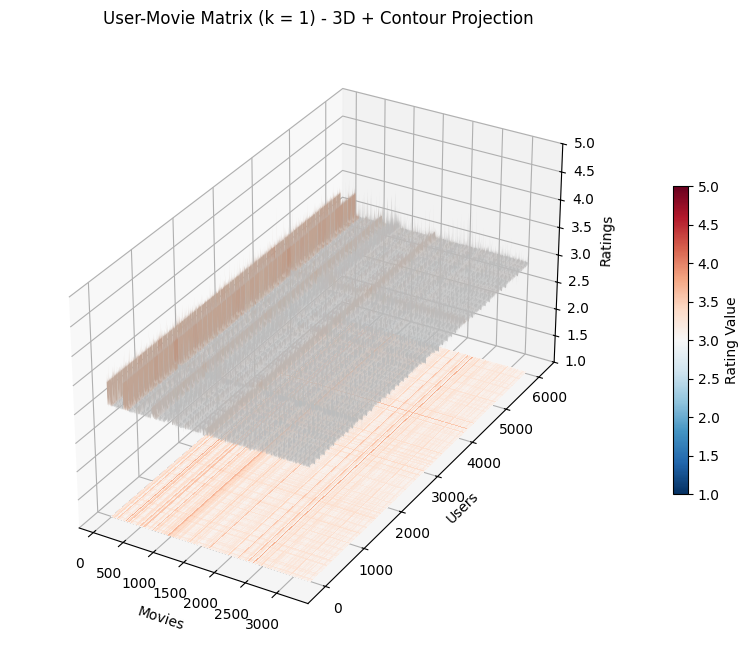

Matrix with k = 50
User-Item Matrix Shape: (6040, 3260)


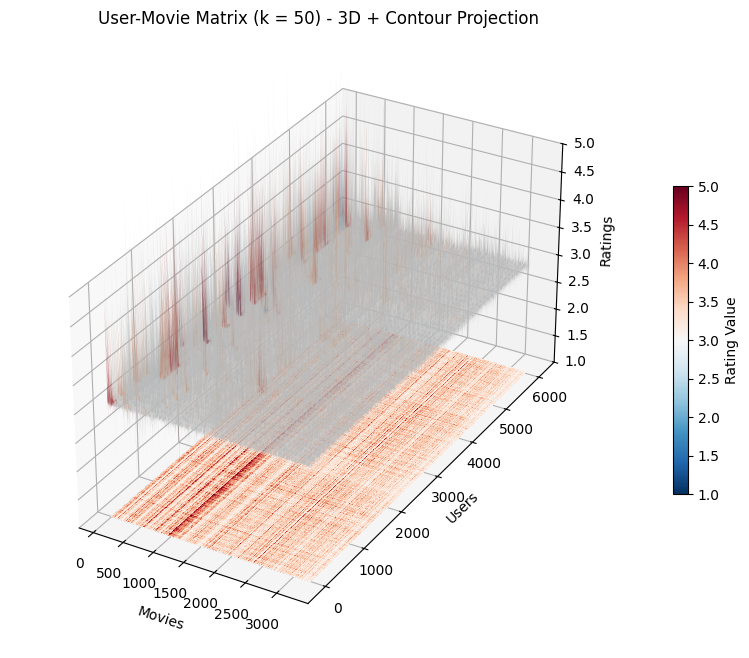

Matrix with k = 250
User-Item Matrix Shape: (6040, 3260)


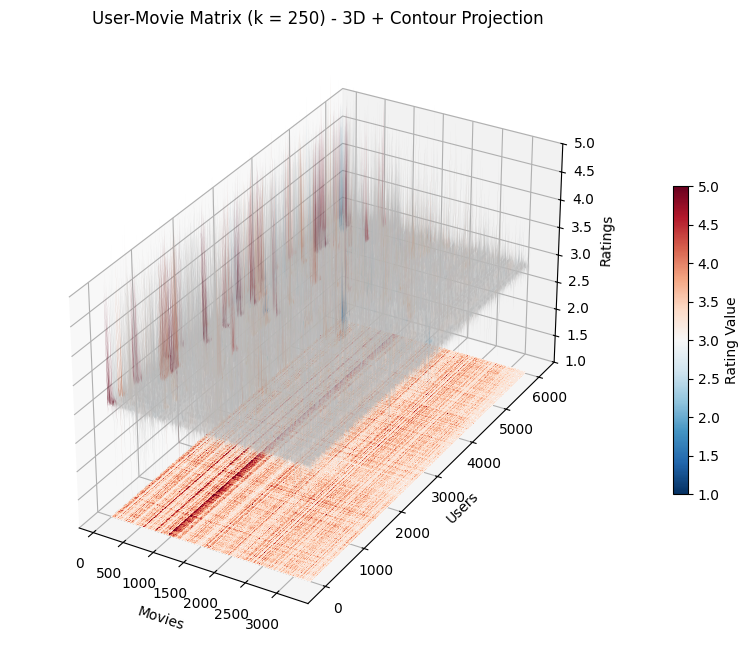

In [11]:
# Display the reconstructed matrix
for k in [1, 50, 250]:
    U, sigma, Vt = svd_with_shift(matrix, num_singular_values=k, maxIter=1000, relTol=1e-3)
    matrix_hat = np.dot(U, np.dot(sigma, Vt))
    mat_show_3D(matrix_hat, k, min_val, max_val, plot_type='surface')

In [12]:
# We plot the significance of the singular values
U, sigma, Vt = svd_with_shift(A, num_singular_values=1000, maxIter=1000, relTol=1e-3)

sigma_cm = np.cumsum(np.diag(sigma)) / np.sum(np.diag(sigma))

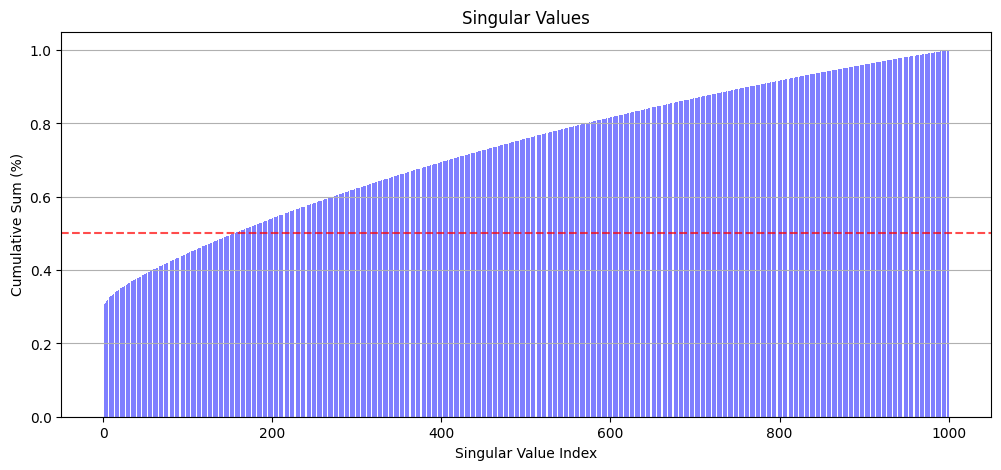

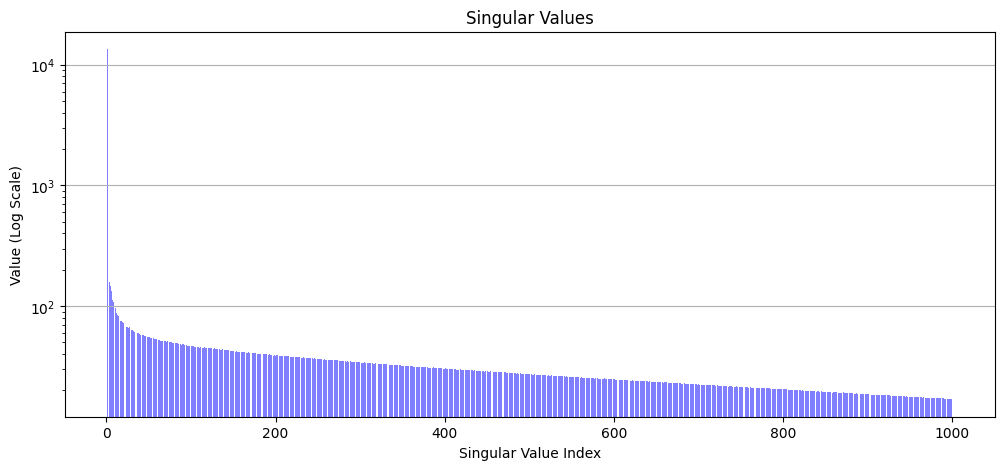

In [13]:
plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 1001), sigma_cm, color='blue', alpha=0.5)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7)
plt.title('Singular Values')
plt.xlabel('Singular Value Index')
plt.ylabel('Cumulative Sum (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 1001), np.diag(sigma), color='blue', alpha=0.5)
plt.title('Singular Values')
plt.xlabel('Singular Value Index')
plt.ylabel('Value (Log Scale)')
plt.yscale('log')
plt.grid(axis='y')
plt.show()

We derive that 50% of the cumulative sum of the size of each singular value is contained in the first 250 singular values. Therefore we select k = 250.

In [14]:
# Example SVD computation
U1, sigma1, Vt1 = svds(matrix, k=250)  # k is the number of latent features

# Sort the singular values in descending order
sorted_indices = np.argsort(sigma1)[::-1]  # Indices for sorting in descending order
sigma1 = sigma[sorted_indices]           # Sort singular values
U1 = U1[:, sorted_indices]                # Reorder columns of U
Vt1 = Vt1[sorted_indices, :]              # Reorder rows of V^T

# Convert sigma to a diagonal matrix
sigma1 = np.diag(sigma1)

# Print shapes for verification
print("U shape:", U1.shape)        # Should be (rows in matrix, k)
print("Sigma shape:", sigma1.shape)  # Should be (k, k)
print("Vt shape:", Vt1.shape)      # Should be (k, columns in matrix)

U shape: (6040, 250)
Sigma shape: (250,)
Vt shape: (250, 3260)


In [15]:
U, sigma, Vt = svd_with_shift(A, num_singular_values=250, maxIter=1000, relTol=1e-3)

From the given decomposition we can reconstruct the original matrix and in doing so predict the missing ratings

In [16]:
# Reconstruct the predicted matrix as A = U * sigma * Vt
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

# Convert back to a DataFrame
predicted_ratings = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

print("Predicted Ratings:")
predicted_ratings.head()

Predicted Ratings:


MovieID,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.849248,2.803304,3.119602,3.034558,2.977237,3.017978,2.970715,3.004926,3.019155,3.036697,...,3.044214,2.928805,2.946090,2.994396,2.991813,2.948840,2.918308,3.010417,3.027972,3.001707
2,3.107560,3.005538,3.089020,3.073390,3.061317,2.806186,2.887342,2.986245,2.947733,3.089971,...,2.961050,3.002566,2.998537,3.044436,2.962693,2.969838,2.825115,3.012402,2.968897,2.926111
3,3.102379,3.126125,3.036363,2.986079,3.040644,3.138544,3.089753,2.985699,2.986662,3.028554,...,2.991181,2.995259,2.988918,2.974206,2.944892,3.000557,3.080520,3.016344,2.984033,3.001669
4,3.012884,2.977195,3.096592,3.007423,2.997272,3.011827,2.960938,2.995025,2.992083,3.043785,...,3.020314,3.033896,3.018288,3.078704,3.004691,3.120298,3.042513,2.992312,3.009946,2.913970
5,3.221899,2.910218,3.092360,2.948477,3.070790,2.353598,3.046010,2.991858,3.065607,2.714042,...,3.005102,3.033044,2.986893,2.955580,2.935609,2.832436,3.101732,2.950477,3.020622,2.851064


## 6. Recommend Movies
Based on the matrix of predictions we just computed we can recommend top-rated movies based on predicted ratings

In [17]:
def recommend_movies(user_id, predicted_ratings, original_data, num_recommendations=5):
    user_row = predicted_ratings.loc[user_id].sort_values(ascending=False)

    # Exclude movies the user has already rated
    rated_movies = original_data[original_data['UserID'] == user_id]['MovieID']
    recommendations = user_row[~user_row.index.isin(rated_movies)].head(num_recommendations)

    # Map back to movie titles
    recommended_movies = movies[movies['MovieID'].isin(recommendations.index)]
    return recommended_movies

# Recommend movies for a specific user (e.g., user_id = 1)
user_id = 1
recommended_movies = recommend_movies(user_id, predicted_ratings, full_data, num_recommendations=5)

print("Recommended Movies for User {}:".format(user_id))
recommended_movies

Recommended Movies for User 1:


,MovieID,Title,Genres
360,364,"Lion King, The (1994)",Animation|Children's|Musical
941,953,It's a Wonderful Life (1946),Drama
1019,1032,Alice in Wonderland (1951),Animation|Children's|Musical
2018,2087,Peter Pan (1953),Animation|Children's|Fantasy|Musical
2027,2096,Sleeping Beauty (1959),Animation|Children's|Musical


## 7. Evaluation
//TODO: implement some MSE to evaluate our recomendations

In [18]:
# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error

# Filter out NaN values
predicted_ratings = predicted_ratings.fillna(0)

# Calculate MSE
rmse = np.sqrt(mean_squared_error(matrix, predicted_matrix))
print("RMSE:", rmse)

RMSE: 0.18025953079047843


## 8. Conclusions
// TODO: write conclusions